In [4]:
# 快疯了，实在不行 ,换镜像
import os
os.environ['HF_ENDPOINT'] = 'https://hf-mirror.com'

In [1]:
# IDBM情感分类大作业
import pandas as pd

In [2]:
# 加载数据集
train_df = pd.read_csv('Train.csv')
valid_df = pd.read_csv('Valid.csv')
test_df = pd.read_csv('Test.csv')

# 查看数据的前几行
print(train_df.head())
print(valid_df.head())
print(test_df.head())

# 检查数据的基本信息
print(train_df.info())
print(valid_df.info())
print(test_df.info())

                                                text  label
0  I grew up (b. 1965) watching and loving the Th...      0
1  When I put this movie in my DVD player, and sa...      0
2  Why do people who do not know what a particula...      0
3  Even though I have great interest in Biblical ...      0
4  Im a die hard Dads Army fan and nothing will e...      1
                                                text  label
0  It's been about 14 years since Sharon Stone aw...      0
1  someone needed to make a car payment... this i...      0
2  The Guidelines state that a comment must conta...      0
3  This movie is a muddled mish-mash of clichés f...      0
4  Before Stan Laurel became the smaller half of ...      0
                                                text  label
0  I always wrote this series off as being a comp...      0
1  1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...      0
2  This movie was so poorly written and directed ...      0
3  The most interesting thing about Miry

In [3]:
# 完成作业任务：
# 加载数据集
train_df = pd.read_csv('Train.csv')
valid_df = pd.read_csv('Valid.csv')
test_df = pd.read_csv('Test.csv')

# 数据集大小
print(f"训练集大小: {len(train_df)}")
print(f"开发集大小: {len(valid_df)}")
print(f"测试集大小: {len(test_df)}")


训练集大小: 40000
开发集大小: 5000
测试集大小: 5000


In [4]:
import re
from nltk.corpus import stopwords
import nltk

In [7]:
# 下载NLTK停用词
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [8]:
# 定义改进后的文本清洗函数
def clean_text(text, remove_stopwords=True):
    # 转换为小写
    text = text.lower()
    # 去除HTML标签
    text = re.sub(r'<.*?>', '', text)
    # 去除特殊字符和标点符号
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # 去除数字（可选）
    text = re.sub(r'\d+', '', text)
    # 去除多余的空格
    text = re.sub(r'\s+', ' ', text).strip()
    # 去除停用词
    if remove_stopwords:
        stop_words = set(stopwords.words('english'))
        text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

In [9]:
# 对训练集、验证集和测试集进行清洗
train_df['text'] = train_df['text'].apply(clean_text)
valid_df['text'] = valid_df['text'].apply(clean_text)
test_df['text'] = test_df['text'].apply(clean_text)

# 查看清洗后的数据
print("训练集清洗后的示例:")
print(train_df['text'].head())

print("验证集清洗后的示例:")
print(valid_df['text'].head())

print("测试集清洗后的示例:")
print(test_df['text'].head())


训练集清洗后的示例:
0    grew b watching loving thunderbirds mates scho...
1    put movie dvd player sat coke chips expectatio...
2    people know particular time past like feel nee...
3    even though great interest biblical movies bor...
4    im die hard dads army fan nothing ever change ...
Name: text, dtype: object
验证集清洗后的示例:
0    years since sharon stone awarded viewers legcr...
1    someone needed make car payment truly awful ma...
2    guidelines state comment must contain minimum ...
3    movie muddled mishmash clichs recent cinema pr...
4    stan laurel became smaller half alltime greate...
Name: text, dtype: object
测试集清洗后的示例:
0    always wrote series complete stinkfest jim bel...
1    st watched dirsteve purcell typical mary kate ...
2    movie poorly written directed fell asleep minu...
3    interesting thing miryang secret sunshine acto...
4    first read berlin meer didnt expect much thoug...
Name: text, dtype: object


In [10]:
# 检查训练集、验证集和测试集是否包含空值
print("训练集空值检查:")
print(train_df['text'].isnull().sum())

print("验证集空值检查:")
print(valid_df['text'].isnull().sum())

print("测试集空值检查:")
print(test_df['text'].isnull().sum())


训练集空值检查:
0
验证集空值检查:
0
测试集空值检查:
0


In [11]:
# 统计训练集中正向和负向情感的句子数量
positive_count = train_df['label'].value_counts().get(1, 0)
negative_count = train_df['label'].value_counts().get(0, 0)

print(f"训练集中正向情感的句子数量: {positive_count}")
print(f"训练集中负向情感的句子数量: {negative_count}")


训练集中正向情感的句子数量: 19981
训练集中负向情感的句子数量: 20019


In [12]:
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

# 获取正向和负向情感的文本
positive_texts = train_df[train_df['label'] == 1]['text']
negative_texts = train_df[train_df['label'] == 0]['text']

# 统计正向情感中频率前十的词
positive_vectorizer = CountVectorizer()
positive_counts = positive_vectorizer.fit_transform(positive_texts)
positive_word_counts = Counter(dict(zip(positive_vectorizer.get_feature_names_out(), positive_counts.sum(axis=0).tolist()[0])))
print("正向情感中频率前十的词:", positive_word_counts.most_common(10))

# 统计负向情感中频率前十的词
negative_vectorizer = CountVectorizer()
negative_counts = negative_vectorizer.fit_transform(negative_texts)
negative_word_counts = Counter(dict(zip(negative_vectorizer.get_feature_names_out(), negative_counts.sum(axis=0).tolist()[0])))
print("负向情感中频率前十的词:", negative_word_counts.most_common(10))


正向情感中频率前十的词: [('film', 31398), ('movie', 28943), ('one', 20627), ('like', 13765), ('good', 11496), ('great', 10105), ('story', 9891), ('see', 9506), ('time', 9420), ('well', 8786)]
负向情感中频率前十的词: [('movie', 38088), ('film', 28060), ('one', 19716), ('like', 17435), ('even', 11964), ('good', 11429), ('bad', 11249), ('would', 10887), ('really', 9791), ('time', 9271)]


In [13]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

In [14]:
# 计算 PMI
def calculate_pmi(word_counts, total_words, class_counts, total_docs):
    pmi = {}
    for word, count in word_counts.items():
        p_word = count / total_words
        p_class = class_counts / total_docs
        p_word_class = count / total_words
        pmi[word] = np.log2(p_word_class / (p_word * p_class))
    return pmi

# 统计正向情感中 PMI 前十大的词
total_positive_words = sum(positive_word_counts.values())
total_negative_words = sum(negative_word_counts.values())
total_docs = len(train_df)

positive_pmi = calculate_pmi(positive_word_counts, total_positive_words, positive_count, total_docs)
print("正向情感中 PMI 前十大的词:", sorted(positive_pmi.items(), key=lambda x: x[1], reverse=True)[:10])

# 统计负向情感中 PMI 前十大的词
negative_pmi = calculate_pmi(negative_word_counts, total_negative_words, negative_count, total_docs)
print("负向情感中 PMI 前十大的词:", sorted(negative_pmi.items(), key=lambda x: x[1], reverse=True)[:10])

正向情感中 PMI 前十大的词: [('abruptly', np.float64(1.0013712117175861)), ('actions', np.float64(1.0013712117175861)), ('adversity', np.float64(1.0013712117175861)), ('aid', np.float64(1.0013712117175861)), ('altered', np.float64(1.0013712117175861)), ('angle', np.float64(1.0013712117175861)), ('anthology', np.float64(1.0013712117175861)), ('anxious', np.float64(1.0013712117175861)), ('argentos', np.float64(1.0013712117175861)), ('article', np.float64(1.0013712117175861))]
负向情感中 PMI 前十大的词: [('aag', np.float64(0.998630090315276)), ('abandoned', np.float64(0.998630090315276)), ('abbott', np.float64(0.998630090315276)), ('abc', np.float64(0.998630090315276)), ('abducted', np.float64(0.998630090315276)), ('ability', np.float64(0.998630090315276)), ('aboard', np.float64(0.998630090315276)), ('abomination', np.float64(0.998630090315276)), ('aborted', np.float64(0.998630090315276)), ('abortion', np.float64(0.998630090315276))]


In [1]:
import spacy

In [2]:
spacy.__version__

'3.8.6'

In [3]:
# 加载 spaCy 模型
nlp = spacy.load("en_core_web_sm")

In [20]:
# 统计训练集中词的词性分布
pos_counts = Counter()
for text in train_df['text']:
    doc = nlp(text)
    for token in doc:
        pos_counts[token.pos_] += 1

print("训练集中词的词性分布:", pos_counts.most_common())

NameError: name 'nlp' is not defined

In [ ]:
# 统计训练集中词的情感倾向
sentiment_counts = Counter()
for text in train_df['text']:
    words = text.lower().split()
    for word in words:
        if word in positive_words:
            sentiment_counts["positive"] += 1
        elif word in negative_words:
            sentiment_counts["negative"] += 1

print("训练集中词的情感倾向:", sentiment_counts)


import nltk
nltk.download('wordnet', download_dir='/path/to/custom/dir', force=True)


In [21]:
from nltk.stem import WordNetLemmatizer

# 下载WordNet
nltk.download('wordnet')#国外服务器太卡了，得开魔法啊啊啊

[nltk_data] Downloading package wordnet to /root/nltk_data...


KeyboardInterrupt: 

In [15]:
# 初始化词形还原器
lemmatizer = WordNetLemmatizer()

# 定义词形还原函数
def lemmatize_text(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

# 对数据集应用词形还原
train_df['text'] = train_df['text'].apply(lemmatize_text)
valid_df['text'] = valid_df['text'].apply(lemmatize_text)
test_df['text'] = test_df['text'].apply(lemmatize_text)

In [16]:
# 保存清洗后的数据
train_df.to_csv('train_cleaned.csv', index=False)
valid_df.to_csv('valid_cleaned.csv', index=False)
test_df.to_csv('test_cleaned.csv', index=False)


In [17]:
## 准备进行标签分布的检查

In [18]:
# 加载清洗后的数据
train_df = pd.read_csv('train_cleaned.csv')
valid_df = pd.read_csv('valid_cleaned.csv')
test_df = pd.read_csv('test_cleaned.csv')

In [19]:
# 训练集标签分布
print("训练集标签分布:")
print(train_df['label'].value_counts())

# 验证集标签分布
print("验证集标签分布:")
print(valid_df['label'].value_counts())

# 测试集标签分布
print("测试集标签分布:")
print(test_df['label'].value_counts())


训练集标签分布:
label
0    20019
1    19981
Name: count, dtype: int64
验证集标签分布:
label
1    2514
0    2486
Name: count, dtype: int64
测试集标签分布:
label
1    2505
0    2495
Name: count, dtype: int64


In [20]:
#很明显，根据我们标签分布结果，数据集的标签分布相对均衡，因此不需要进行额外的数据平衡处理。

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipykernel_1564/2290149241.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='Set2')


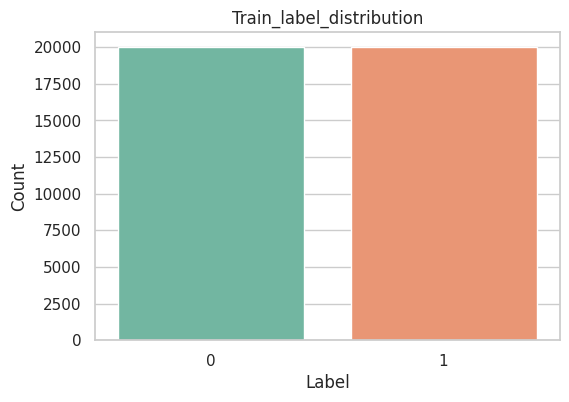

/tmp/ipykernel_1564/2290149241.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='Set2')


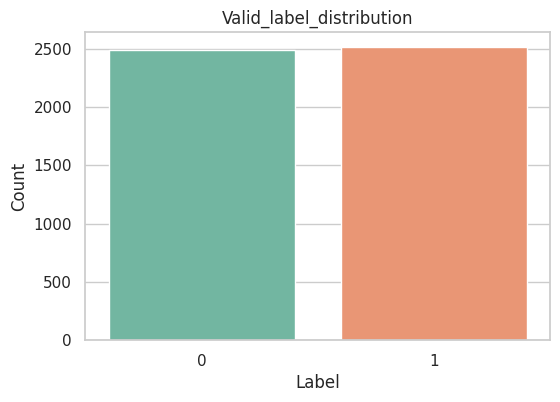

/tmp/ipykernel_1564/2290149241.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='Set2')


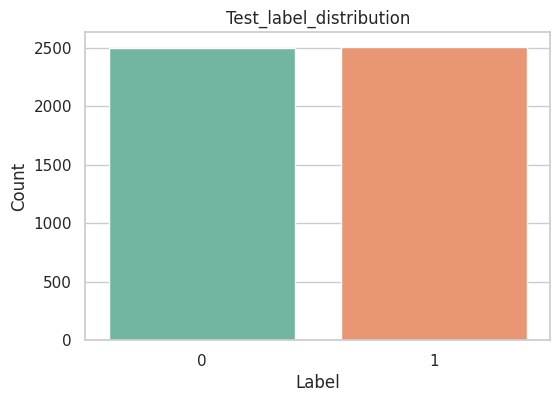

In [25]:
# 设置绘图风格
sns.set(style="whitegrid")

#plt.rcParams['font.family'] = 'sans-serif'  # 更换字体家族
#plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用宋体

# 定义绘制标签分布的函数
def plot_label_distribution(df, title):
    plt.figure(figsize=(6, 4))
    sns.countplot(x='label', data=df, palette='Set2')
    plt.title(title)
    plt.xlabel('Label')
    plt.ylabel('Count')
    plt.show()

# 绘制训练集、验证集和测试集的标签分布
plot_label_distribution(train_df, 'Train_label_distribution')
plot_label_distribution(valid_df, 'Valid_label_distribution')
plot_label_distribution(test_df, 'Test_label_distribution')


In [26]:
# 根据上面的图像输出结果来看

In [27]:
# 保存标签分布结果
label_distribution = {
    'train': train_df['label'].value_counts().to_dict(),
    'valid': valid_df['label'].value_counts().to_dict(),
    'test': test_df['label'].value_counts().to_dict()
}

In [28]:
import json
with open('label_distribution.json', 'w') as f:
    json.dump(label_distribution, f, indent=4)

In [29]:
# 1.4 下面进行文本向量化

In [30]:
# !pip install openai

In [33]:
from transformers import AutoTokenizer, AutoModel #不想吐槽了，之前还正常，现在不开魔法都不行，好好好
import torch

In [35]:
# 加载模型和分词器
tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')
model = AutoModel.from_pretrained('distilbert-base-uncased')
# HuggingFace又连不上去，算了暑假我来看看解决方法

In [36]:
# 换modelscope

2025-05-19 18:54:18,290 - modelscope - WARNING - Using branch: master as version is unstable, use with caution
2025-05-19 18:54:18,597 - modelscope - INFO - Got 3 files, start to download ...
Processing 3 items:   0%|          | 0.00/3.00 [00:00<?, ?it/s]




Processing 3 items:  33%|███▎      | 1.00/3.00 [00:05<00:10, 5.46s/it]



Processing 3 items: 100%|██████████| 3.00/3.00 [00:05<00:00, 1.84s/it]
2025-05-19 18:54:24,112 - modelscope - INFO - Download model 'AI-ModelScope/distilbert-base-uncased' successfully.


2025-05-19 18:54:25,047 - modelscope - WARNING - Using branch: master as version is unstable, use with caution
2025-05-19 18:54:25,348 - modelscope - INFO - Got 9 files, start to download ...
Processing 9 items:   0%|          | 0.00/9.00 [00:00<?, ?it/s]






























Processing 9 items:  11%|█         | 1.00/9.00 [00:00<00:02, 3.57it/s]

























































































































































































































































Processing 9 items:  33%|███▎      | 3.00/9.00 [00:05<00:11, 1.98s/it]





































































































































































































































































































































In [12]:
from tqdm import tqdm  # 导入 tqdm 库

In [40]:
import torch
print(torch.cuda.is_available())  # 如果返回 True，说明 CUDA 可用


True


In [63]:
# 将模型移动到 GPU
model = model.to('cuda')

sentences = train_df['text'].tolist()
embeddings = []

# 使用 tqdm 包装 sentences 列表，显示进度条
for sentence in tqdm(sentences, desc="Generating embeddings", unit="sentence"):
    inputs = tokenizer(sentence, return_tensors="pt", padding=True, truncation=True, max_length=512)
    
    # 将输入数据移动到 GPU
    inputs = {key: value.to('cuda') for key, value in inputs.items()}
    
    with torch.no_grad():
        outputs = model(**inputs)
    
    # 将输出数据移回 CPU，以便后续处理
    embedding = outputs.last_hidden_state.mean(dim=1).squeeze().cpu().numpy()
    embeddings.append(embedding)


Generating embeddings: 100%|██████████| 40000/40000 [03:46<00:00, 176.57sentence/s]


# 对train生成嵌入
sentences = train_df['text'].tolist()
embeddings = []

# 使用 tqdm 包装 sentences 列表，显示进度条
for sentence in tqdm(sentences, desc="Generating embeddings", unit="sentence"):
    inputs = tokenizer(sentence, return_tensors="pt", padding=True, truncation=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    embeddings.append(outputs.last_hidden_state.mean(dim=1).squeeze().numpy())


In [64]:
# 保存嵌入
import numpy as np

In [65]:
np.save('train_embeddings.npy', embeddings)

In [66]:
# 开始模型预测

In [7]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

In [68]:
# 我们之前使用了 DistilBERT 嵌入
X_train = np.load('train_embeddings.npy')
y_train = train_df['label'].values

In [6]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

In [70]:
# 初始化高斯高斯朴素贝叶斯模型
nb_model = GaussianNB()

# 训练模型
nb_model.fit(X_train, y_train)

# 预测
y_pred = nb_model.predict(X_train)

# 评估模型
print("高斯高斯朴素贝叶斯模型训练集准确率:", accuracy_score(y_train, y_pred))
print("分类报告:\n", classification_report(y_train, y_pred))

高斯高斯朴素贝叶斯模型训练集准确率: 0.7308
分类报告:
               precision    recall  f1-score   support

           0       0.72      0.76      0.74     20019
           1       0.74      0.70      0.72     19981

    accuracy                           0.73     40000
   macro avg       0.73      0.73      0.73     40000
weighted avg       0.73      0.73      0.73     40000



In [5]:
from sklearn.linear_model import LogisticRegression

In [72]:
# 初始化逻辑回归模型
lr_model = LogisticRegression(max_iter=1000)

# 训练模型
lr_model.fit(X_train, y_train)

# 预测
y_pred = lr_model.predict(X_train)

# 评估模型
print("逻辑回归模型训练集准确率:", accuracy_score(y_train, y_pred))
print("分类报告:\n", classification_report(y_train, y_pred))

逻辑回归模型训练集准确率: 0.853475
分类报告:
               precision    recall  f1-score   support

           0       0.85      0.86      0.85     20019
           1       0.86      0.85      0.85     19981

    accuracy                           0.85     40000
   macro avg       0.85      0.85      0.85     40000
weighted avg       0.85      0.85      0.85     40000



In [73]:
# 下面准备进行验证集评估模型

In [74]:
# 对valid生成嵌入
sentences = valid_df['text'].tolist()
embeddings = []

# 使用 tqdm 包装 sentences 列表，显示进度条
for sentence in tqdm(sentences, desc="Generating embeddings", unit="sentence"):
    inputs = tokenizer(sentence, return_tensors="pt", padding=True, truncation=True, max_length=512)
    
    # 将输入数据移动到 GPU
    inputs = {key: value.to('cuda') for key, value in inputs.items()}
    
    with torch.no_grad():
        outputs = model(**inputs)
    
    # 将输出数据移回 CPU，以便后续处理
    embedding = outputs.last_hidden_state.mean(dim=1).squeeze().cpu().numpy()
    embeddings.append(embedding)

Generating embeddings: 100%|██████████| 5000/5000 [00:28<00:00, 174.75sentence/s]


In [75]:
np.save('valid_embeddings.npy', embeddings)

In [76]:
# 生成验证集嵌入（假设已生成并保存为 valid_embeddings.npy）
X_valid = np.load('valid_embeddings.npy')
y_valid = valid_df['label'].values

# 使用高斯朴素贝叶斯模型预测验证集
y_pred_nb = nb_model.predict(X_valid)
print("高斯朴素贝叶斯模型验证集准确率:", accuracy_score(y_valid, y_pred_nb))

# 使用逻辑回归模型预测验证集
y_pred_lr = lr_model.predict(X_valid)
print("逻辑回归模型验证集准确率:", accuracy_score(y_valid, y_pred_lr))


高斯朴素贝叶斯模型验证集准确率: 0.7296
逻辑回归模型验证集准确率: 0.8476


In [159]:
# 对test生成嵌入
sentences = test_df['text'].tolist()
embeddings = []

# 使用 tqdm 包装 sentences 列表，显示进度条
for sentence in tqdm(sentences, desc="Generating embeddings", unit="sentence"):
    inputs = tokenizer(sentence, return_tensors="pt", padding=True, truncation=True, max_length=512)
    
    # 将输入数据移动到 GPU
    inputs = {key: value.to('cuda') for key, value in inputs.items()}
    
    with torch.no_grad():
        outputs = model(**inputs)
    
    # 将输出数据移回 CPU，以便后续处理
    embedding = outputs.last_hidden_state.mean(dim=1).squeeze().cpu().numpy()
    embeddings.append(embedding)

Generating embeddings: 100%|██████████| 5000/5000 [00:28<00:00, 173.38sentence/s]


In [160]:
np.save('test_embeddings.npy', embeddings)

In [77]:
# 下面我们对嵌入特征进行特征选择（降维）
#

In [8]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [79]:
# 加载嵌入数据
X_train = np.load('train_embeddings.npy')
X_valid = np.load('valid_embeddings.npy')

In [80]:
# 初始化 PCA，降维到 100 维（可以根据需要调整）
pca = PCA(n_components=100)

# 对训练集进行拟合和转换
X_train_pca = pca.fit_transform(X_train)

# 对验证集进行转换
X_valid_pca = pca.transform(X_valid)

# 保存降维后的数据
np.save('train_embeddings_pca.npy', X_train_pca)
np.save('valid_embeddings_pca.npy', X_valid_pca)

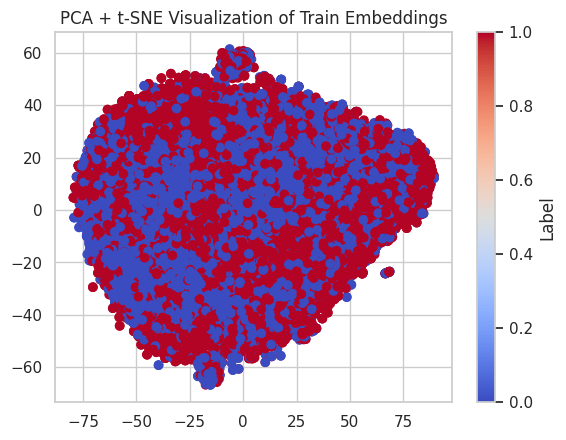

In [81]:
# 初始化 t-SNE，降维到 2 维（主要用于可视化）
tsne = TSNE(n_components=2, random_state=42)

# 对训练集进行降维（t-SNE 不支持 transform，只能重新拟合）
X_train_tsne = tsne.fit_transform(X_train_pca)

# 可视化降维结果
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=train_df['label'], cmap='coolwarm')
plt.title('PCA + t-SNE Visualization of Train Embeddings')
plt.colorbar(label='Label')
plt.show()

In [143]:
import umap.umap_ as umap
import matplotlib.pyplot as plt

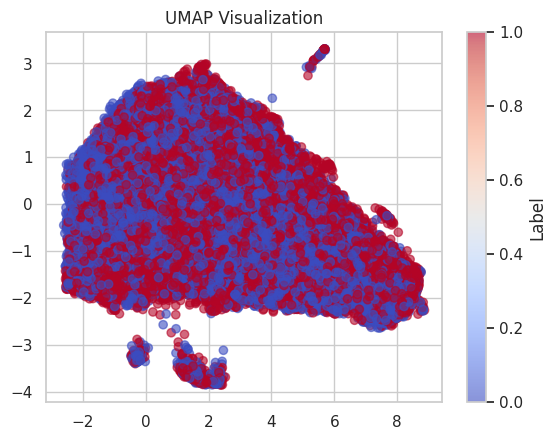

In [144]:
# 使用 UMAP 降维
reducer = umap.UMAP()
X_umap = reducer.fit_transform(X_train)

# 可视化
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y_train, cmap='coolwarm', alpha=0.6)
plt.title("UMAP Visualization")
plt.colorbar(label='Label')
plt.show()

In [ ]:
# 效果还是不好：好吧，作为未来尝试突破方向
# why:

In [82]:
# 初始化高斯朴素贝叶斯模型
nb_model = GaussianNB()

# 训练模型
nb_model.fit(X_train_pca,train_df['label'])

# 预测
y_pred = nb_model.predict(X_valid_pca)

# 评估模型
print("高斯朴素贝叶斯模型验证集准确率:", accuracy_score(valid_df['label'], y_pred))

高斯朴素贝叶斯模型验证集准确率: 0.704


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [84]:
# 使用 PCA 降维后的数据进行训练
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_pca, train_df['label'])

# 在验证集上评估模型
y_pred = lr_model.predict(X_valid_pca)
print("逻辑回归验证集准确率:", accuracy_score(valid_df['label'], y_pred))

逻辑回归验证集准确率: 0.8236


In [10]:
# 题目要求：使用词频作为特征的逻辑回归模型
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [86]:
# 加载清洗后的数据
train_df = pd.read_csv('train_cleaned.csv')
test_df = pd.read_csv('test_cleaned.csv')

# 获取文本和标签
train_texts = train_df['text'].tolist()
train_labels = train_df['label'].tolist()

test_texts = test_df['text'].tolist()
test_labels = test_df['label'].tolist()


In [87]:
# 使用 TF-IDF 向量化文本
vectorizer = TfidfVectorizer(max_features=5000)  # 限制最大特征数为 5000
X_train_tfidf = vectorizer.fit_transform(train_texts)
X_test_tfidf = vectorizer.transform(test_texts)


In [88]:
from sklearn.feature_selection import SelectKBest, chi2


In [89]:
# 选择最好的前 200 个特征
selector_200 = SelectKBest(chi2, k=200)
X_train_200 = selector_200.fit_transform(X_train_tfidf, train_labels)
X_test_200 = selector_200.transform(X_test_tfidf)

# 选择最好的前 2000 个特征
selector_2000 = SelectKBest(chi2, k=2000)
X_train_2000 = selector_2000.fit_transform(X_train_tfidf, train_labels)
X_test_2000 = selector_2000.transform(X_test_tfidf)


In [90]:
# 训练使用前 200 个特征的逻辑回归模型
lr_model_200 = LogisticRegression(max_iter=1000)
lr_model_200.fit(X_train_200, train_labels)

# 训练使用前 2000 个特征的逻辑回归模型
lr_model_2000 = LogisticRegression(max_iter=1000)
lr_model_2000.fit(X_train_2000, train_labels)

# 评估模型
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f"准确率: {accuracy_score(y_test, y_pred):.4f}")
    print("分类报告:\n", classification_report(y_test, y_pred))


In [91]:
print("Logistic使用前 200 个特征的模型性能:")
evaluate_model(lr_model_200, X_test_200, test_labels)

print("Logistic使用前 2000 个特征的模型性能:")
evaluate_model(lr_model_2000, X_test_2000, test_labels)


使用前 200 个特征的模型性能:
准确率: 0.8468
分类报告:
               precision    recall  f1-score   support

           0       0.86      0.83      0.84      2495
           1       0.83      0.87      0.85      2505

    accuracy                           0.85      5000
   macro avg       0.85      0.85      0.85      5000
weighted avg       0.85      0.85      0.85      5000

使用前 2000 个特征的模型性能:
准确率: 0.8858
分类报告:
               precision    recall  f1-score   support

           0       0.89      0.88      0.88      2495
           1       0.88      0.90      0.89      2505

    accuracy                           0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



In [92]:
# 设计新的特征并训练模型

In [93]:
# 定义情感词典
positive_words = {
    "good", "great", "excellent", "happy", "love", "amazing", "wonderful", "fantastic", 
    "awesome", "brilliant", "perfect", "fabulous", "superb", "outstanding", "delightful", 
    "joyful", "pleased", "ecstatic", "thrilled", "glad", "blissful", "cheerful", 
    "content", "grateful", "optimistic", "positive", "satisfied", "elated", "euphoric", 
    "jubilant", "radiant", "serene", "triumphant", "upbeat", "victorious", "admirable", 
    "charming", "enjoyable", "favorable", "heartwarming", "inspiring", "magnificent", 
    "marvelous", "remarkable", "splendid", "stellar", "stupendous", "terrific", 
    "admiration", "affection", "bliss", "euphoria", "gratitude", "joy", "love", 
    "passion", "pleasure", "pride", "satisfaction", "triumph", "zeal"
}

negative_words = {
    "bad", "terrible", "awful", "sad", "hate", "horrible", "dreadful", "miserable", 
    "disappointing", "unhappy", "angry", "annoyed", "frustrated", "irritated", 
    "depressed", "gloomy", "heartbroken", "hopeless", "lonely", "melancholy", 
    "pessimistic", "sorrowful", "upset", "worried", "bitter", "despair", "disgust", 
    "envy", "fear", "grief", "guilt", "hatred", "jealousy", "regret", "shame", 
    "suffering", "tragic", "unfortunate", "agony", "anxiety", "desperation", 
    "discontent", "displeasure", "distress", "gloom", "heartache", "misery", 
    "pain", "resentment", "sadness", "torment", "unhappiness", "woe", "wrath"
}


In [94]:
def extract_new_features(texts):
    lengths = [len(text) for text in texts]  # 文本长度
    sentiment_counts = []
    for text in texts:
        words = text.lower().split()  # 将文本转换为小写并分词
        pos_count = sum(1 for word in words if word in positive_words)
        neg_count = sum(1 for word in words if word in negative_words)
        sentiment_counts.append(pos_count - neg_count)  # 情感词数量（正面词 - 负面词）
    return lengths, sentiment_counts

# 提取训练集和测试集的新特征
train_lengths, train_sentiment_counts = extract_new_features(train_texts)
test_lengths, test_sentiment_counts = extract_new_features(test_texts)


In [95]:
from scipy.sparse import hstack

# 将新特征与 TF-IDF 特征结合
X_train_new = hstack([X_train_tfidf, np.array(train_lengths).reshape(-1, 1), np.array(train_sentiment_counts).reshape(-1, 1)])
X_test_new = hstack([X_test_tfidf, np.array(test_lengths).reshape(-1, 1), np.array(test_sentiment_counts).reshape(-1, 1)])


In [96]:
# 训练新的逻辑回归模型
lr_model_new = LogisticRegression(max_iter=1000)
lr_model_new.fit(X_train_new, train_labels)

# 评估模型
print("使用新特征的模型性能:")
evaluate_model(lr_model_new, X_test_new, test_labels)


使用新特征的模型性能:
准确率: 0.8834
分类报告:
               precision    recall  f1-score   support

           0       0.89      0.88      0.88      2495
           1       0.88      0.89      0.88      2505

    accuracy                           0.88      5000
   macro avg       0.88      0.88      0.88      5000
weighted avg       0.88      0.88      0.88      5000



/usr/local/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# 事已至此，我们试试用开源大模型进行分类
# 使用开源大模型 roberta-base 并且进行微调Finetuned

# Load model directly
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("wrmurray/roberta-base-finetuned-imdb")
model = AutoModelForSequenceClassification.from_pretrained("wrmurray/roberta-base-finetuned-imdb")

In [16]:
import pandas as pd
import numpy as np
import torch
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from scipy.special import softmax
from sklearn.metrics import accuracy_score, classification_report
from torch.amp import autocast  # 使用最新的混合精度语法

In [17]:
# 检查 GPU 是否可用
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# 加载清洗后的数据
train_data = pd.read_csv("train_cleaned.csv")
valid_data = pd.read_csv("valid_cleaned.csv")
test_data = pd.read_csv("test_cleaned.csv")

# 提取文本和标签
train_texts = train_data["text"].tolist()
train_labels = train_data["label"].tolist()
valid_texts = valid_data["text"].tolist()
valid_labels = valid_data["label"].tolist()
test_texts = test_data["text"].tolist()
test_labels = test_data["label"].tolist()

Using device: cuda


In [25]:
# 加载模型和 tokenizer
tokenizer = AutoTokenizer.from_pretrained("wrmurray/roberta-base-finetuned-imdb")
model = AutoModelForSequenceClassification.from_pretrained("wrmurray/roberta-base-finetuned-imdb").to(device)  # 将模型移动到 GPU

In [19]:
# 将文本编码为模型输入格式
def encode_texts(texts, max_length=512):
    encodings = tokenizer(
        texts,
        padding=True,
        truncation=True,
        max_length=max_length,
        return_tensors="pt",
    )
    # 将编码后的张量移动到 GPU
    encodings = {k: v.to(device) for k, v in encodings.items()}
    return encodings

In [20]:
# 分批处理数据
def batch_process(texts, batch_size=32):
    for i in range(0, len(texts), batch_size):
        yield texts[i:i + batch_size]

In [21]:
# 传入编码后的文本数据并获取模型输出
def classify_sentiment(encodings):
    with torch.no_grad(), autocast(device_type='cuda'):  # 使用混合精度
        outputs = model(**encodings)
        logits = outputs.logits
        scores = softmax(logits.cpu().numpy(), axis=1)
    return scores

In [22]:
# 获取情感分类结果
def get_predictions(texts, batch_size=32):
    predictions = []
    for batch in batch_process(texts, batch_size):
        encodings = encode_texts(batch)
        scores = classify_sentiment(encodings)
        preds = np.argmax(scores, axis=1)
        predictions.extend(preds)
    return predictions

In [26]:
train_preds = get_predictions(train_texts)
valid_preds = get_predictions(valid_texts)
test_preds = get_predictions(test_texts)

In [27]:
# 将结果保存到 CSV 文件
train_data["predicted_label"] = train_preds
valid_data["predicted_label"] = valid_preds
test_data["predicted_label"] = test_preds

train_data.to_csv("train_results.csv", index=False)
valid_data.to_csv("valid_results.csv", index=False)
test_data.to_csv("test_results.csv", index=False)

In [28]:
# 评估模型性能
train_accuracy = accuracy_score(train_labels, train_preds)
valid_accuracy = accuracy_score(valid_labels, valid_preds)
test_accuracy = accuracy_score(test_labels, test_preds)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Valid Accuracy: {valid_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

print("Train Classification Report:")
print(classification_report(train_labels, train_preds))

print("Valid Classification Report:")
print(classification_report(valid_labels, valid_preds))

print("Test Classification Report:")
print(classification_report(test_labels, test_preds))

Train Accuracy: 0.8956
Valid Accuracy: 0.8938
Test Accuracy: 0.8974
Train Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     20019
           1       0.93      0.86      0.89     19981

    accuracy                           0.90     40000
   macro avg       0.90      0.90      0.90     40000
weighted avg       0.90      0.90      0.90     40000

Valid Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.90      2486
           1       0.92      0.86      0.89      2514

    accuracy                           0.89      5000
   macro avg       0.90      0.89      0.89      5000
weighted avg       0.90      0.89      0.89      5000

Test Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      2495
           1       0.93      0.86      0.89      2505

    accuracy                

In [29]:
# 我们之前使用了 DistilBERT 嵌入/加载词嵌入
X_train = np.load('train_embeddings.npy')
X_valid = np.load('valid_embeddings.npy')
X_test = np.load('test_embeddings.npy')

# 加载标签
train_data = pd.read_csv("train_cleaned.csv")
valid_data = pd.read_csv("valid_cleaned.csv")
test_data = pd.read_csv("test_cleaned.csv")

y_train = train_data['label'].values
y_valid = valid_data['label'].values
y_test = test_data['label'].values

In [32]:
# 生成词嵌入
def generate_embeddings(texts, max_length=256):  # 选择序列长度为 256
    encodings = tokenizer(
        texts,
        padding=True,
        truncation=True,
        max_length=max_length,
        return_tensors="pt",
    )
    encodings = {k: v.to(device) for k, v in encodings.items()}
    with torch.no_grad():
        outputs = model(**encodings)
    return outputs.last_hidden_state  # 返回完整的序列嵌入

# 生成训练、验证和测试集的词嵌入
X_train = generate_embeddings(train_texts)
X_valid = generate_embeddings(valid_texts)
X_test = generate_embeddings(test_texts)

# 检查形状
print(X_train.shape)  # 应为 (40000, 256, 768)应为 (batch_size, seq_length, 768)
print(X_valid.shape)  # 应为 (5000, 256, 768)
print(X_test.shape)   # 应为 (5000, 256, 768)


torch.Size([40000, 768])
torch.Size([5000, 768])
torch.Size([5000, 768])


In [30]:
# 模型前面加载过了,放到了GPU上

In [ ]:
import torch
from scipy.special import softmax

In [ ]:
# 检查词嵌入形状
print("X_train shape:", X_train.shape)  # 应为 (batch_size, 768)
print("X_valid shape:", X_valid.shape)  # 应为 (batch_size, 768)
print("X_test shape:", X_test.shape)    # 应为 (batch_size, 768)

# 将词嵌入转换为 PyTorch tensor 并移动到 GPU
X_train = torch.tensor(X_train).to(device)
X_valid = torch.tensor(X_valid).to(device)
X_test = torch.tensor(X_test).to(device)

# 传入词嵌入并获取模型输出
def classify_sentiment(embeddings):
    with torch.no_grad():
        # 将池化后的嵌入作为输入
        outputs = model(inputs_embeds=embeddings.unsqueeze(1))  # 添加一个维度
        logits = outputs.logits
        scores = softmax(logits.cpu().numpy(), axis=1)
    return scores

# 获取情感分类结果
train_scores = classify_sentiment(X_train)
valid_scores = classify_sentiment(X_valid)
test_scores = classify_sentiment(X_test)

X_train shape: torch.Size([40000, 768])
X_valid shape: torch.Size([5000, 768])
X_test shape: torch.Size([5000, 768])


/tmp/ipykernel_209/1174037379.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train).to(device)
/tmp/ipykernel_209/1174037379.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_valid = torch.tensor(X_valid).to(device)
/tmp/ipykernel_209/1174037379.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(X_test).to(device)


In [34]:
# 解析情感标签
train_preds = np.argmax(train_scores, axis=1)
valid_preds = np.argmax(valid_scores, axis=1)
test_preds = np.argmax(test_scores, axis=1)

# 将结果保存到 CSV 文件
train_data["predicted_label"] = train_preds
valid_data["predicted_label"] = valid_preds
test_data["predicted_label"] = test_preds

train_data.to_csv("train_results_embeddings.csv", index=False)
valid_data.to_csv("valid_results_embeddings.csv", index=False)
test_data.to_csv("test_results_embeddings.csv", index=False)


In [35]:
from sklearn.metrics import accuracy_score, classification_report

# 计算准确率
train_accuracy = accuracy_score(y_train, train_preds)
valid_accuracy = accuracy_score(y_valid, valid_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Valid Accuracy: {valid_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# 打印分类报告
print("Train Classification Report:")
print(classification_report(y_train, train_preds))

print("Valid Classification Report:")
print(classification_report(y_valid, valid_preds))

print("Test Classification Report:")
print(classification_report(y_test, test_preds))


Train Accuracy: 0.5014
Valid Accuracy: 0.5008
Test Accuracy: 0.4998
Train Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.97      0.66     20019
           1       0.52      0.03      0.05     19981

    accuracy                           0.50     40000
   macro avg       0.51      0.50      0.36     40000
weighted avg       0.51      0.50      0.36     40000

Valid Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.98      0.66      2486
           1       0.57      0.03      0.06      2514

    accuracy                           0.50      5000
   macro avg       0.53      0.50      0.36      5000
weighted avg       0.53      0.50      0.36      5000

Test Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.98      0.66      2495
           1       0.52      0.02      0.05      2505

    accuracy                

In [ ]:
# 好了开始调用大模型

In [ ]:
# 下面准备调用GPT-4o

In [128]:
import openai
import time
from sklearn.metrics import accuracy_score, classification_report

In [135]:
# 定义 GPT-4o 情感分类函数
def query_gpt4_for_sentiment(text):
    openai.api_key = "sk-fZLKt3NsRKDcxhoBD7OslUKYAkP9S0CkjwTcecizofjclQsT"  # 替换为您的 API 密钥
    openai.api_base = 'https://4o.zhangsan.shop/v1/chat/completions'  # 使用官方 API 地址

    try:
        response = openai.ChatCompletion.create(
            model="GPT-4o",  # 使用 GPT-4o 模型
            messages=[
    {"role": "system", "content": "You are a sentiment analysis assistant. Classify the sentiment of the text as 'positive' or 'negative'."},
    {"role": "user", "content": "Text: I love this product! It's amazing.\nSentiment: positive"},
    {"role": "user", "content": "Text: This is the worst experience I've ever had.\nSentiment: negative"},
    {"role": "user", "content": f"Text: {text}\nSentiment:"}
                     ]
        )
        sentiment = response['choices'][0]['message']['content'].strip().lower()
        if 'positive' in sentiment:
            return 1
        elif 'negative' in sentiment:
            return 0
        else:
            return -1  # 未知情感
    except Exception as e:
        return str(e)


In [136]:
# 对测试集进行情感分类（至少 200 条）
batch_size = 10  # 每批处理 10 条文本
delay = 2  # 每次请求之间的延迟（秒）
test_gpt4_labels = []

for i in range(0, 200, batch_size):  # 仅测试前 200 条数据
    batch = test_texts[i:i + batch_size]
    for text in batch:
        sentiment = query_gpt4_for_sentiment(text)
        test_gpt4_labels.append(1 if sentiment.lower() == 'positive' else 0)
    time.sleep(delay)  # 添加延迟以避免速率限制


In [137]:
# 评估 GPT-4o 的分类结果
from sklearn.metrics import accuracy_score, classification_report


In [138]:
accuracy = accuracy_score(test_labels[:200], test_gpt4_labels)
print(f"GPT-4o 分类准确率: {accuracy:.4f}")
print("分类报告:\n", classification_report(test_labels[:200], test_gpt4_labels))


GPT-4o 分类准确率: 0.5500
分类报告:
               precision    recall  f1-score   support

           0       0.55      1.00      0.71       110
           1       0.00      0.00      0.00        90

    accuracy                           0.55       200
   macro avg       0.28      0.50      0.35       200
weighted avg       0.30      0.55      0.39       200



/usr/local/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [133]:
# 定义 GPT-4o 结构化输出函数
def query_gpt4_for_structured_output(text):
    openai.api_key = "sk-fZLKt3NsRKDcxhoBD7OslUKYAkP9S0CkjwTcecizofjclQsT"  # 替换为您的 API 密钥
    openai.api_base = 'https://4o.zhangsan.shop/v1/chat/completions'  # 使用官方 API 地址

    try:
        response = openai.ChatCompletion.create(
            model="GPT-4o-2024-11-20",  # 使用 GPT-4o 模型
            messages=[
                {"role": "system", "content": "You are a helpful assistant."},
                {"role": "user", "content": f"Analyze the following text and provide structured output:\n1. Topic: What is the main topic of the text?\n2. Sentiment: Is the sentiment 'positive' or 'negative'?\nText: {text}"}
            ]
        )
        return response['choices'][0]['message']['content']
    except Exception as e:
        return str(e)


In [134]:
# 对测试集进行结构化输出（至少 20 条）
structured_outputs = []
for i in range(20):  # 仅测试前 20 条数据
    text = test_texts[i]
    output = query_gpt4_for_structured_output(text)
    structured_outputs.append(output)
    print(f"Text: {text}")
    print(f"Structured Output:\n{output}\n")
    time.sleep(delay)  # 添加延迟以避免速率限制


Text: always wrote series complete stinkfest jim belushi involved heavily one day tragic happenstance occurred white sox game ended realized remote way side room somehow could gotten walked across room get remote even tv turn channel get walk across country watch tv another state nut said decided hang tight couch take whatever fate store fate store episode show episode remember little except made broad general sweeping blanket judgment based zero objective experiential evidence nothing whatsoever back opinion completely right show total crudpie belushi comedic delivery hairy lighthouse foghorn woman physically attractive stepfordis elicit real feeling viewer absolutely reason stop running local tv station gasoline flamethrower sending every copy mutt howling back hell except except wonderful comic sty ling larry joe campbell america greatest comic character actor guy play belushis brotherinlaw andy gold good really well aside funny job make belushi look good thats like trying make butt

In [ ]:
# 好好GPT-4o演我

In [1]:
# pip install openai==1.63.2
from openai import OpenAI

In [ ]:
client = OpenAI(
    api_key="xxxxxxxxxxxxxxxxxxxx",  # your api token
    base_url="https://api.gpugeek.com/v1",  # endpoint
)


In [3]:
# 加载测试集嵌入和标签
test_embeddings = np.load('test_embeddings.npy')
test_labels = np.array(test_df['label'])  # 假设 test_df 是测试集的 DataFrame
test_texts = test_df['text'].tolist()  # 获取测试集的原始文本


NameError: name 'np' is not defined

In [176]:
# 定义 Prompt 模板
prompt_template = """
I am using IMDB dataset for text sentiment classification (binary classification: Positive/Negative), please analyze the following texts and output the structured results:
1. Topic: the topic that the text talks about.
2. Sentiment: the sentiment (Positive, Negative) expressed by the text.
3. Intensity of emotion: the intensity of the emotion (low, medium, high).
4. Keywords: key words in the text.

Text: {text}
"""



In [177]:
# 分析测试集中的数据
results = []
for text in test_texts[:20]:  # 测试前 20 条数据
    # 构造 Prompt
    prompt = prompt_template.format(text=text)
    
    # 调用模型（流式输出）
    stream = client.chat.completions.create(
        model="GpuGeek/Qwen3-32B",
        stream=True,
        frequency_penalty=0,
        max_tokens=8192,
        messages=[
            {
                "role": "user",
                "content": prompt,
            }
        ],
        temperature=0.6,
        top_p=0.7,
    )
    
    # 获取模型输出（流式）
    output = ""
    for chunk in stream:
        if chunk.choices[0].delta.content:
            output += chunk.choices[0].delta.content
    
    # 保存结果
    results.append({
        "text": text,
        "analysis": output
    })

# 输出结果
for result in results:
    print(f"文本: {result['text']}")
    print(f"分析结果: {result['analysis']}")
    print("-" * 50)


ImportError: cannot import name 'FileChunkingStrategyParam' from 'openai.types.beta' (/usr/local/miniconda3/lib/python3.10/site-packages/openai/types/beta/__init__.py)

In [178]:
import json

# 保存结果到 JSON 文件
with open('test_results.json', 'w', encoding='utf-8') as f:
    json.dump(results, f, ensure_ascii=False, indent=4)



In [1]:
# 现在我准备调用Qwen3-32B来进行通用大模型/文本生成类大模型测试

In [ ]:
import requests
import pandas as pd
import json
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report

In [ ]:
# API 设置
API_KEY = "xxxxxxxxxxxxxxxxxxxxxxxx"  # 替换为您的API密钥
URL = 'https://api.gpugeek.com/predictions'
HEADERS = {
    "Authorization": f"Bearer {API_KEY}",
    "Content-Type": "application/json",
    "Stream": "true"
}

In [ ]:
# 读取清洗后的IMDB测试集数据
test_data = pd.read_csv("test_cleaned.csv")  

reviews = test_data["text"].tolist()  # 获取评论列表

# 读取真实标签
true_labels = test_data["label"].tolist()[:200]  # 取前200条的真实标签

In [ ]:
# 任务1：情感分类（三种Prompt策略，测试200条数据）
def task1_sentiment_classification(reviews, num_samples=200):
    results_strategy1 = []  # 策略1结果
    results_strategy2 = []  # 策略2结果
    results_strategy3 = []  # 策略3结果

    for review in reviews[:num_samples]:  # 测试前200条
        # 策略1：直接情感判断
        prompt1 = f"Classify the sentiment of the following movie review as 'positive' or 'negative':\n{review}\nSentiment:"
        data = {
            "model": "GpuGeek/Qwen3-32B",
            "input": {"prompt": prompt1, "max_tokens": 50, "temperature": 0.6, "top_p": 0.7}
        }
        response = requests.post(URL, headers=HEADERS, json=data)
        if response.status_code == 200:
            result = "".join(line.decode("utf-8") for line in response.iter_lines() if line)
            results_strategy1.append(result.strip())
        else:
            print(f"Strategy 1 Error: {response.status_code}, {response.text}")

        # 策略2：情感评分
        prompt2 = f"Rate the sentiment of the following movie review on a scale of 1 to 5, where 1 is very negative and 5 is very positive:\n{review}\nRating:"
        data["input"]["prompt"] = prompt2
        response = requests.post(URL, headers=HEADERS, json=data)
        if response.status_code == 200:
            result = "".join(line.decode("utf-8") for line in response.iter_lines() if line)
            results_strategy2.append(result.strip())
        else:
            print(f"Strategy 2 Error: {response.status_code}, {response.text}")

        # 策略3：情感分析与解释
        prompt3 = f"Analyze the sentiment of the following movie review and explain why:\n{review}\nSentiment Analysis:"
        data["input"]["prompt"] = prompt3
        data["input"]["max_tokens"] = 200  # 需要更多token
        response = requests.post(URL, headers=HEADERS, json=data)
        if response.status_code == 200:
            result = "".join(line.decode("utf-8") for line in response.iter_lines() if line)
            results_strategy3.append(result.strip())
        else:
            print(f"Strategy 3 Error: {response.status_code}, {response.text}")

    # 保存任务1结果
    with open("results_task1_strategy1.txt", "w", encoding="utf-8") as f:
        f.write("\n".join(results_strategy1))
    with open("results_task1_strategy2.txt", "w", encoding="utf-8") as f:
        f.write("\n".join(results_strategy2))
    with open("results_task1_strategy3.txt", "w", encoding="utf-8") as f:
        f.write("\n".join(results_strategy3))

    # 评估策略1的性能
    evaluate_performance(results_strategy1, true_labels, "Strategy 1")

In [ ]:
# 评估模型性能
def evaluate_performance(predictions, true_labels, strategy_name):
    # 将预测结果转换为与真实标签一致的格式
    predicted_labels = [pred.lower() for pred in predictions]  # 转换为小写
    predicted_labels = ["positive" if "positive" in pred else "negative" for pred in predicted_labels]

    # 计算准确率
    accuracy = accuracy_score(true_labels, predicted_labels)
    print(f"{strategy_name} Accuracy: {accuracy:.4f}")

    # 计算混淆矩阵
    cm = confusion_matrix(true_labels, predicted_labels, labels=["positive", "negative"])
    print(f"{strategy_name} Confusion Matrix:\n{cm}")

    # 计算F1分数
    f1 = f1_score(true_labels, predicted_labels, pos_label="positive")
    print(f"{strategy_name} F1 Score: {f1:.4f}")

    # 打印分类报告
    report = classification_report(true_labels, predicted_labels, labels=["positive", "negative"])
    print(f"{strategy_name} Classification Report:\n{report}")

    # 错误分析：保存预测错误的样本
    errors = []
    for i, (pred, true) in enumerate(zip(predicted_labels, true_labels)):
        if pred != true:
            errors.append({"index": i, "predicted": pred, "true": true})
    with open(f"errors_{strategy_name}.json", "w", encoding="utf-8") as f:
        json.dump(errors, f, ensure_ascii=False, indent=2)
    print(f"{strategy_name} Errors saved to errors_{strategy_name}.json")

In [ ]:
# 任务2：结构化输出（测试20条数据）
def task2_structured_output(reviews, num_samples=20):
    results_structured = []

    for review in reviews[:num_samples]:  # 测试前20条
        prompt = f"Analyze the following movie review, identify its theme and sentiment, and output in JSON format with 'theme' and 'sentiment' fields:\n{review}"
        data = {
            "model": "GpuGeek/Qwen3-32B",
            "input": {"prompt": prompt, "max_tokens": 200, "temperature": 0.6, "top_p": 0.7}
        }
        response = requests.post(URL, headers=HEADERS, json=data)
        if response.status_code == 200:
            result = "".join(line.decode("utf-8") for line in response.iter_lines() if line)
            try:
                json_result = json.loads(result)
                results_structured.append(json_result)
            except json.JSONDecodeError:
                print(f"JSON Parsing Failed: {result}")
        else:
            print(f"Structured Output Error: {response.status_code}, {response.text}")

    # 保存任务2结果
    with open("results_task2.json", "w", encoding="utf-8") as f:
        json.dump(results_structured, f, ensure_ascii=False, indent=2)

In [ ]:
# 执行任务
task1_sentiment_classification(reviews, num_samples=200)
task2_structured_output(reviews, num_samples=20)

print("结果已保存！")